In [7]:
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt

In [8]:
d_train = pd.read_csv("compas_dataset/propublicaTrain.csv")
d_test = pd.read_csv("compas_dataset/propublicaTest.csv")

In [9]:
d_train['race'].value_counts()

0    2731
1    1436
Name: race, dtype: int64

In [11]:
d_test['race'].value_counts()

0    1336
1     664
Name: race, dtype: int64

In [287]:
feature_column = ['sex','age','race','juv_fel_count','juv_misd_count','juv_other_count','priors_count',
                  'c_charge_degree_F','c_charge_degree_M']

train_X = d_train[feature_column].values
train_Y = d_train['two_year_recid'].values

test_X = d_test[feature_column].values
test_Y = d_test['two_year_recid'].values

sample_dataset_small = d_train.sample(n=1000)
train_small_X = sample_dataset_small[feature_column].values
train_small_Y = sample_dataset_small['two_year_recid'].values

sample_dataset_medium = d_train.sample(n=2000)
train_medium_X = sample_dataset_medium[feature_column].values
train_medium_Y = sample_dataset_medium['two_year_recid'].values

sample_dataset_large = d_train.sample(n=3000)
train_large_X = sample_dataset_large[feature_column].values
train_large_Y = sample_dataset_large['two_year_recid'].values

# MLE

In [288]:
def mle(x, u, cov):
    k = x.size
    return ((2 * np.pi) ** (-k/2)) * np.linalg.det(cov) ** (-1/2) * np.exp(-.5 * (x - u).T @ np.linalg.inv(cov) @ (x - u))   

### original dataset 

In [289]:
train_0 = d_train.loc[d_train['two_year_recid'] == 0]
train_1 = d_train.loc[d_train['two_year_recid'] == 1]

train_x_0 = train_0[feature_column].values
train_x_1 = train_1[feature_column].values
train_y_0 = train_0['two_year_recid'].values
train_y_1 = train_1['two_year_recid'].values

u_0 = train_x_0.mean(axis=0)
u_1 = train_x_1.mean(axis=0)
cov_0 = np.cov(train_x_0.T) + np.identity(9)
cov_1 = np.cov(train_x_1.T) + np.identity(9)

prior_0 = len(train_x_0)/len(train_X)
prior_1 = len(train_x_1)/len(train_X)

n = 0
num = len(test_X)

for i in range(num):
    if mle(test_X[i], u_0, cov_0)* prior_0 > mle(test_X[i], u_1, cov_1) * prior_1:
        if test_Y[i] == 0:
            n += 1
    else:
        if test_Y[i] == 1:
            n += 1
mle_o = n/num
print (n/num)   

0.6415


### mle: small trained dataset (1000)

In [290]:
train_small_0 = sample_dataset_small.loc[sample_dataset_small['two_year_recid'] == 0]
train_small_1 = sample_dataset_small.loc[sample_dataset_small['two_year_recid'] == 1]

train_x_small_0 = train_small_0[feature_column].values
train_x_small_1 = train_small_1[feature_column].values
train_y_small_0 = train_small_0['two_year_recid'].values
train_y_small_1 = train_small_1['two_year_recid'].values

u_small_0 = train_x_small_0.mean(axis=0)
u_small_1 = train_x_small_1.mean(axis=0)
cov_small_0 = np.cov(train_x_small_0.T) + np.identity(9)
cov_small_1 = np.cov(train_x_small_1.T) + np.identity(9)

prior_small_0 = len(train_x_small_0)/len(sample_dataset_small)
prior_small_1 = len(train_x_small_1)/len(sample_dataset_small)

n = 0
num = len(test_X)

for i in range(num):
    if mle(test_X[i], u_small_0, cov_small_0)* prior_small_0 > mle(test_X[i], u_small_1, cov_small_1) * prior_small_1:
        if test_Y[i] == 0:
            n += 1
    else:
        if test_Y[i] == 1:
            n += 1

mle_s = n/num            
print (n/num)   

0.6295


### mle: medium trained dataset (2000)

In [291]:
train_medium_0 = sample_dataset_medium.loc[sample_dataset_medium['two_year_recid'] == 0]
train_medium_1 = sample_dataset_medium.loc[sample_dataset_medium['two_year_recid'] == 1]

train_x_medium_0 = train_medium_0[feature_column].values
train_x_medium_1 = train_medium_1[feature_column].values
train_y_medium_0 = train_medium_0['two_year_recid'].values
train_y_medium_1 = train_medium_1['two_year_recid'].values

u_medium_0 = train_x_medium_0.mean(axis=0)
u_medium_1 = train_x_medium_1.mean(axis=0)
cov_medium_0 = np.cov(train_x_medium_0.T) + np.identity(9)
cov_medium_1 = np.cov(train_x_medium_1.T) + np.identity(9)

prior_medium_0 = len(train_x_medium_0)/len(sample_dataset_medium)
prior_medium_1 = len(train_x_medium_1)/len(sample_dataset_medium)

n = 0
num = len(test_X)

for i in range(num):
    if mle(test_X[i], u_medium_0, cov_medium_0)* prior_medium_0 > mle(test_X[i], u_medium_1, cov_medium_1) * prior_medium_1:
        if test_Y[i] == 0:
            n += 1
    else:
        if test_Y[i] == 1:
            n += 1
mle_m = n/num
print (mle_m)   

0.6395


### mle: large trained dataset (3000)

In [292]:
train_large_0 = sample_dataset_large.loc[sample_dataset_large['two_year_recid'] == 0]
train_large_1 = sample_dataset_large.loc[sample_dataset_large['two_year_recid'] == 1]

train_x_large_0 = train_large_0[feature_column].values
train_x_large_1 = train_large_1[feature_column].values
train_y_large_0 = train_large_0['two_year_recid'].values
train_y_large_1 = train_large_1['two_year_recid'].values

u_large_0 = train_x_large_0.mean(axis=0)
u_large_1 = train_x_large_1.mean(axis=0)
cov_large_0 = np.cov(train_x_large_0.T) + np.identity(9)
cov_large_1 = np.cov(train_x_large_1.T) + np.identity(9)

prior_large_0 = len(train_x_large_0)/len(sample_dataset_large)
prior_large_1 = len(train_x_large_1)/len(sample_dataset_large)

n = 0
num = len(test_X)

for i in range(num):
    if mle(test_X[i], u_large_0, cov_large_0)* prior_large_0 > mle(test_X[i], u_large_1, cov_large_1) * prior_large_1:
        if test_Y[i] == 0:
            n += 1
    else:
        if test_Y[i] == 1:
            n += 1
mle_l = n/num
print (n/num)   

0.6415


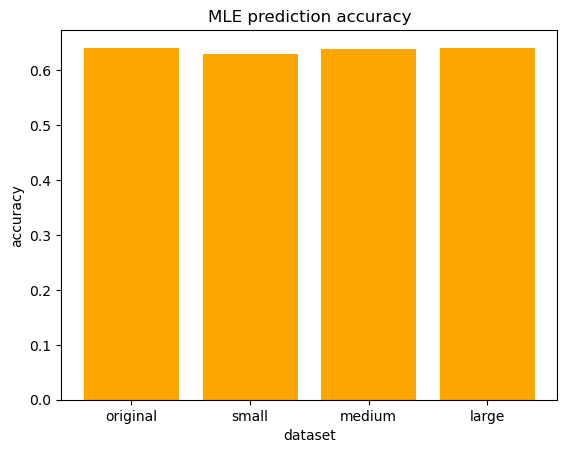

In [293]:
x_mle = [1,2,3,4]
y_mle = [mle_o, mle_s, mle_m, mle_l]
label_mle = ['original', 'small', 'medium', 'large']
plt.bar(x_mle, y_mle, tick_label=label_mle, color=['orange'])
plt.xlabel('dataset')
plt.ylabel('accuracy')
plt.title("MLE prediction accuracy")
plt.show()

# Nearest Neighbor

In [294]:
from math import sqrt

def knn(train_x, train_y, test_x, k, norm):   
    distance = np.linalg.norm(train_x-test_x, axis=1, ord=norm)
    index = np.argsort(distance)[:k]
    neighbor_y = []
    for i in index:
        neighbor_y.append(train_y[i])
    return max(set(neighbor_y), key = neighbor_y.count)    

def knn_accuracy(train_x, train_y, test_x, test_y, k, norm):
    num = len(test_x)
    x = 0
    for a in range(num):
        if test_y[a] == knn(train_x, train_y, test_x[a], k, norm):
            x += 1
    return x/num

In [295]:
ko_11 = knn_accuracy(train_X, train_Y, test_X, test_Y, 1, 1)
ko_12 = knn_accuracy(train_X, train_Y, test_X, test_Y, 1, 2)
ko_1f = knn_accuracy(train_X, train_Y, test_X, test_Y, 1, np.inf)

ks_11 = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 1, 1)
ks_12 = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 1, 2)
ks_1f = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 1, np.inf)

km_11 = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 1, 1)
km_12 = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 1, 2)
km_1f = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 1, np.inf)

kl_11 = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 1, 1)
kl_12 = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 1, 2)
kl_1f = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 1, np.inf)

ko_31 = knn_accuracy(train_X, train_Y, test_X, test_Y, 3, 1)
ko_32 = knn_accuracy(train_X, train_Y, test_X, test_Y, 3, 2)
ko_3f = knn_accuracy(train_X, train_Y, test_X, test_Y, 3, np.inf)

ks_31 = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 3, 1)
ks_32 = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 3, 2)
ks_3f = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 3, np.inf)

km_31 = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 3, 1)
km_32 = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 3, 2)
km_3f = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 3, np.inf)

kl_31 = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 3, 1)
kl_32 = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 3, 2)
kl_3f = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 3, np.inf)

ko_51 = knn_accuracy(train_X, train_Y, test_X, test_Y, 5, 1)
ko_52 = knn_accuracy(train_X, train_Y, test_X, test_Y, 5, 2)
ko_5f = knn_accuracy(train_X, train_Y, test_X, test_Y, 5, np.inf)

ks_51 = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 5, 1)
ks_52 = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 5, 2)
ks_5f = knn_accuracy(train_small_X, train_small_Y, test_X, test_Y, 5, np.inf)

km_51 = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 5, 1)
km_52 = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 5, 2)
km_5f = knn_accuracy(train_medium_X, train_medium_Y, test_X, test_Y, 5, np.inf)

kl_51 = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 5, 1)
kl_52 = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 5, 2)
kl_5f = knn_accuracy(train_large_X, train_large_Y, test_X, test_Y, 5, np.inf)

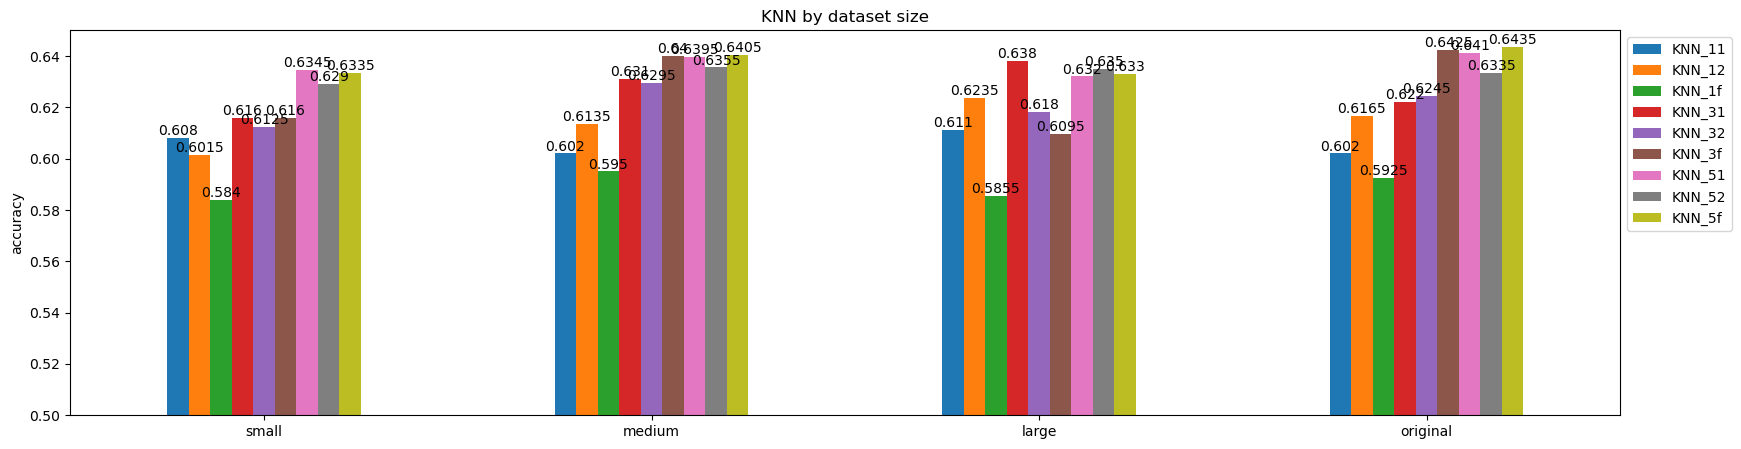

In [296]:
y_k11 = [ks_11, km_11, kl_11, ko_11]
y_k12 = [ks_12, km_12, kl_12, ko_12]
y_k1f = [ks_1f, km_1f, kl_1f, ko_1f]
y_k31 = [ks_31, km_31, kl_31, ko_31]
y_k32 = [ks_32, km_32, kl_32, ko_32]
y_k3f = [ks_3f, km_3f, kl_3f, ko_3f]
y_k51 = [ks_51, km_51, kl_51, ko_51]
y_k52 = [ks_52, km_52, kl_52, ko_52]
y_k5f = [ks_5f, km_5f, kl_5f, ko_5f]

label = ['small', 'medium', 'large','original']

df = pd.DataFrame({'KNN_11':y_k11, 'KNN_12':y_k12, 'KNN_1f':y_k1f, 
                   'KNN_31':y_k31, 'KNN_32':y_k32, 'KNN_3f':y_k3f,
                   'KNN_51':y_k51, 'KNN_52':y_k52, 'KNN_5f':y_k5f}, 
                  index = label)
ax = df.plot.bar(rot=0, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylim(0.5, 0.65)
plt.title('KNN by dataset size')
plt.ylabel('accuracy')
for container in ax.containers:
    ax.bar_label(container)

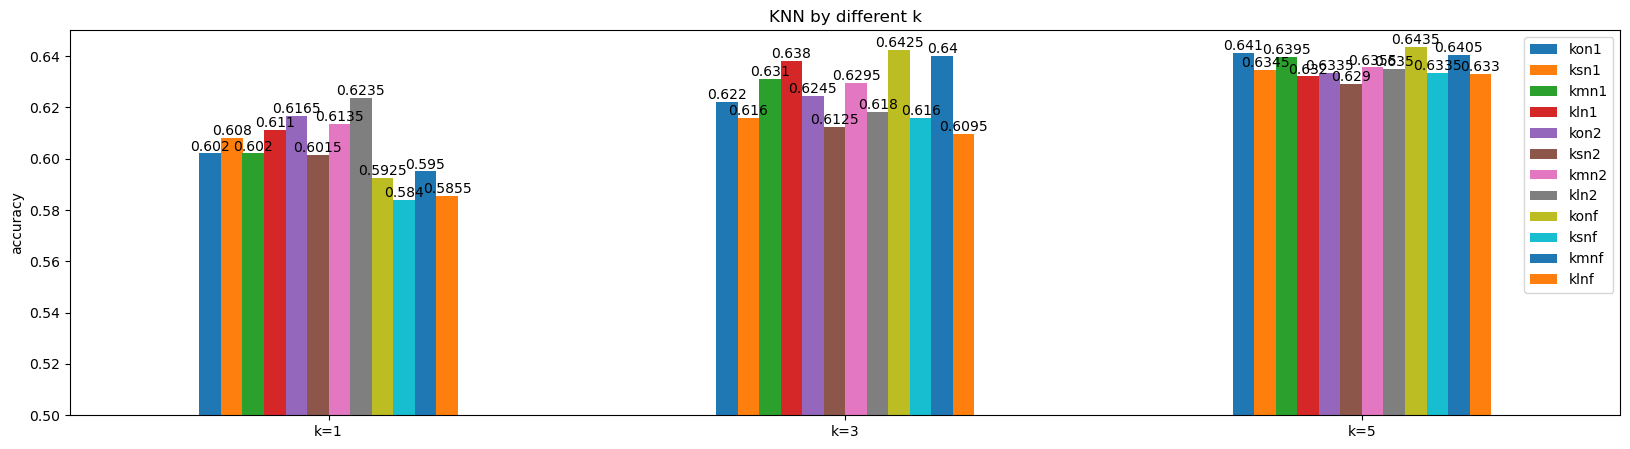

In [297]:
kon1 = [ko_11, ko_31, ko_51]
ksn1 = [ks_11, ks_31, ks_51]
kmn1 = [km_11, km_31, km_51]
kln1 = [kl_11, kl_31, kl_51]
kon2 = [ko_12, ko_32, ko_52]
ksn2 = [ks_12, ks_32, ks_52]
kmn2 = [km_12, km_32, km_52]
kln2 = [kl_12, kl_32, kl_52]
konf = [ko_1f, ko_3f, ko_5f]
ksnf = [ks_1f, ks_3f, ks_5f]
kmnf = [km_1f, km_3f, km_5f]
klnf = [kl_1f, kl_3f, kl_5f]


label = ['k=1', 'k=3', 'k=5']

df = pd.DataFrame({'kon1':kon1, 'ksn1':ksn1, 'kmn1':kmn1, 'kln1':kln1,
                   'kon2':kon2, 'ksn2':ksn2, 'kmn2':kmn2, 'kln2':kln2,
                   'konf':konf, 'ksnf':ksnf, 'kmnf':kmnf, 'klnf':klnf,}, 
                  index = label)
ax = df.plot.bar(rot=0, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylim(0.5, 0.65)
plt.title('KNN by different k')
plt.ylabel('accuracy')
for container in ax.containers:
    ax.bar_label(container)

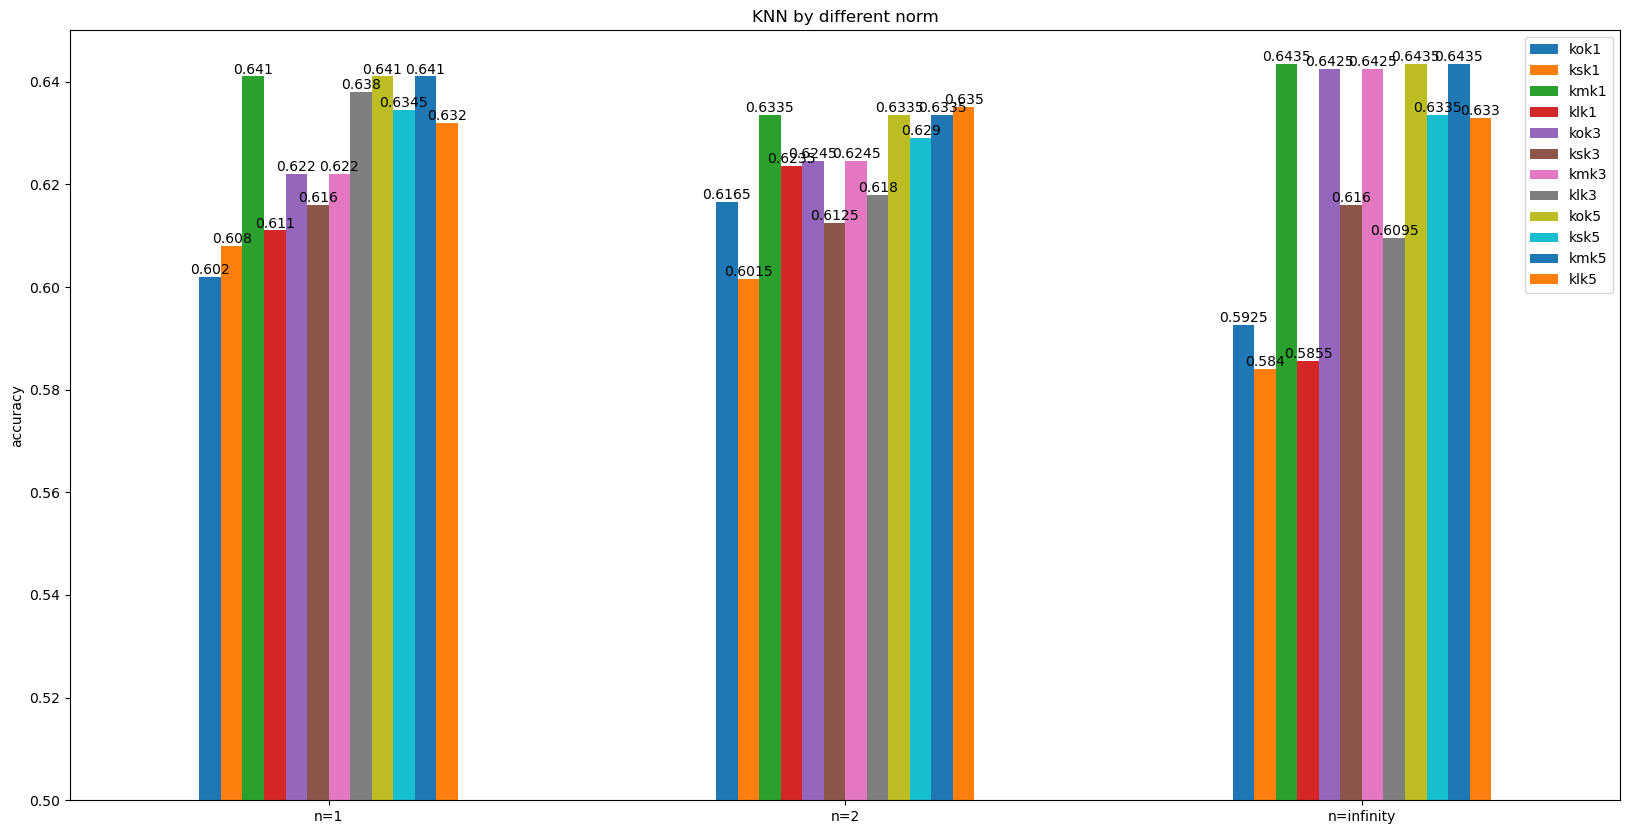

In [298]:
kok1 = [ko_11, ko_12, ko_1f]
kok3 = [ko_31, ko_32, ko_3f]
kok5 = [ko_51, ko_52, ko_5f]
ksk1 = [ks_11, ks_12, ks_1f]
ksk3 = [ks_31, ks_32, ks_3f]
ksk5 = [ks_51, ks_52, ks_5f]
kmk1 = [km_11, km_12, km_1f]
kmk3 = [km_31, km_32, km_3f]
kmk5 = [km_51, km_52, km_5f]
klk1 = [kl_11, kl_12, kl_1f]
klk3 = [kl_31, kl_32, kl_3f]
klk5 = [kl_51, kl_52, kl_5f]

label = ['n=1', 'n=2', 'n=infinity']

df = pd.DataFrame({'kok1':kok1, 'ksk1':ksk1, 'kmk1':kok5, 'klk1' : klk1,
                   'kok3':kok3, 'ksk3':ksk3, 'kmk3':kok3, 'klk3' : klk3,
                   'kok5':kok5, 'ksk5':ksk5, 'kmk5':kok5, 'klk5' : klk5,}, 
                  index = label)
ax = df.plot.bar(rot=0, figsize=(20,10))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylim(0.5, 0.65)
plt.title('KNN by different norm')
plt.ylabel('accuracy')
for container in ax.containers:
    ax.bar_label(container)

## naive bayes 

In [299]:
def naive_bayes_prediction(feature, df0, df1, test_dp, prior0, prior1):
    p0 = 1
    n = len(df0)
    for i in range(len(test_dp)):
        f = feature[i]
        num = len(df0[df0[f] == test_dp[i]])
        p0 *= num/n  
    p1 = 1
    m = len(df1)
    for i in range(len(test_dp)):
        f = feature[i]
        num = len(df1[df1[f] == test_dp[i]])
        p1 *= num/m        
    if prior0*p0 > prior1*p1:
        return 0
    else:
        return 1  
    
def naive_bayes_accuracy(feature, df0, df1, test_x, test_y, p0, p1):
    n = 0
    num = len(test_x)
    for i in range(num):
        if naive_bayes_prediction(feature, df0, df1, test_x[i], p0, p1) == test_y[i]:
            n+=1
    return n/num

In [300]:
nb_o = naive_bayes_accuracy(feature_column, train_0, train_1, test_X, test_Y, prior_0, prior_1)
nb_s = naive_bayes_accuracy(feature_column, train_small_0, train_small_1, test_X, test_Y, prior_small_0, prior_small_1)
nb_m = naive_bayes_accuracy(feature_column, train_medium_0, train_medium_1, test_X, test_Y, prior_medium_0, prior_medium_1)
nb_l = naive_bayes_accuracy(feature_column, train_large_0, train_large_1, test_X, test_Y, prior_large_0, prior_large_1)

# Graphs

In [301]:
def showvalue(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

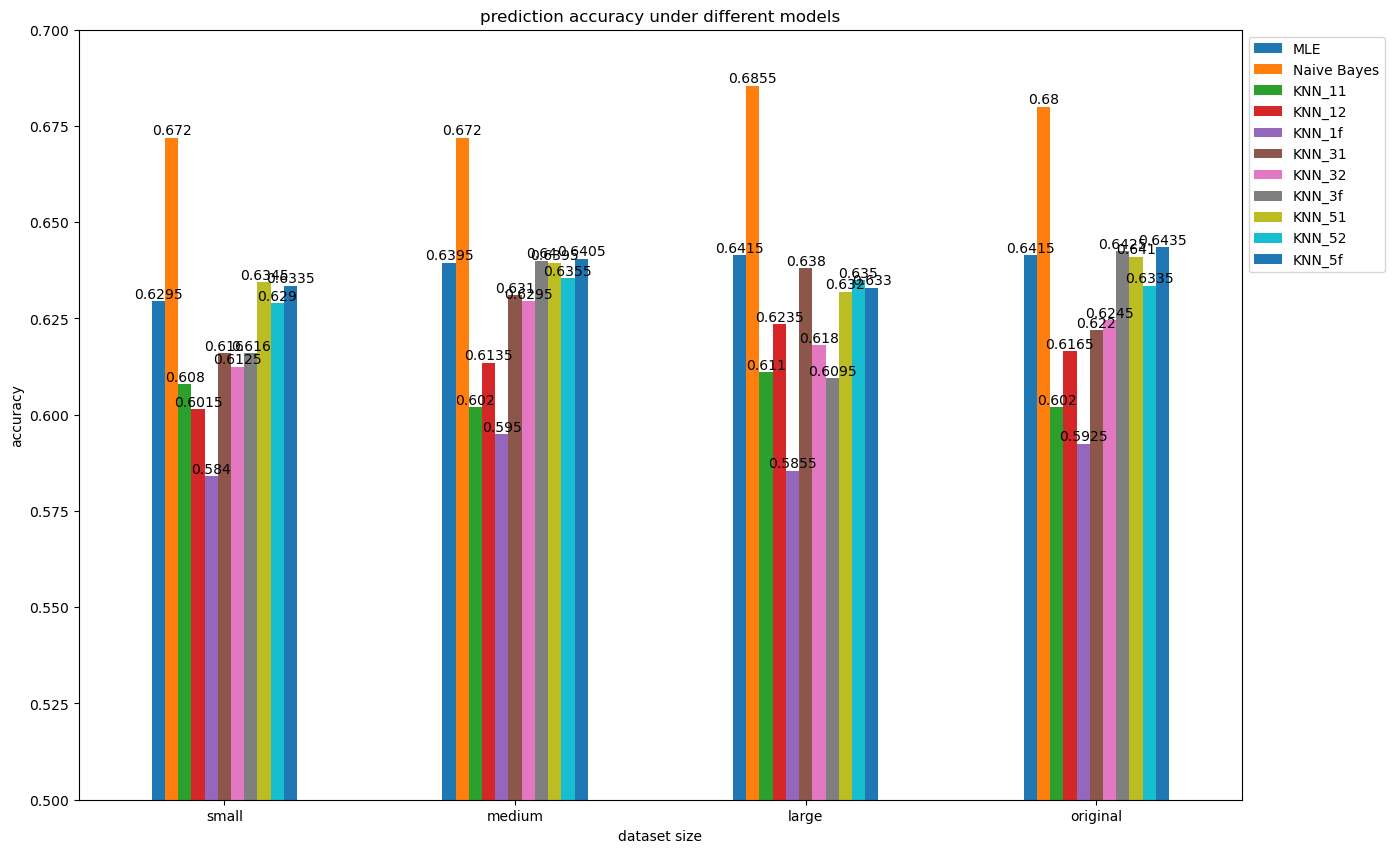

In [302]:
y_mle = [mle_s, mle_m, mle_l, mle_o]
y_nb = [nb_s, nb_m, nb_l,nb_o]
y_k11 = [ks_11, km_11, kl_11, ko_11]
y_k12 = [ks_12, km_12, kl_12, ko_12]
y_k1f = [ks_1f, km_1f, kl_1f, ko_1f]
y_k31 = [ks_31, km_31, kl_31, ko_31]
y_k32 = [ks_32, km_32, kl_32, ko_32]
y_k3f = [ks_3f, km_3f, kl_3f, ko_3f]
y_k51 = [ks_51, km_51, kl_51, ko_51]
y_k52 = [ks_52, km_52, kl_52, ko_52]
y_k5f = [ks_5f, km_5f, kl_5f, ko_5f]

label = [ 'small', 'medium', 'large', 'original']

df = pd.DataFrame({'MLE':y_mle,
                   'Naive Bayes':y_nb, 
                   'KNN_11':y_k11, 'KNN_12':y_k12, 'KNN_1f':y_k1f, 
                   'KNN_31':y_k31, 'KNN_32':y_k32, 'KNN_3f':y_k3f,
                   'KNN_51':y_k51, 'KNN_52':y_k52, 'KNN_5f':y_k5f}, 
                  index=label)
ax = df.plot.bar(rot=0, figsize=(15,10))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylim(0.5, 0.7)
plt.title('prediction accuracy under different models')
plt.ylabel('accuracy')
plt.xlabel('dataset size')
for container in ax.containers:
    ax.bar_label(container)

# Fairness 

In [303]:
test_race_0 = d_test.loc[d_test['race'] == 0]
x_test_0 = test_race_0[feature_column].values
y_test_0 = test_race_0['two_year_recid'].values

test_race_1 = d_test.loc[d_test['race'] == 1]
x_test_1 = test_race_1[feature_column].values
y_test_1 = test_race_1['two_year_recid'].values

test_race_0_small = d_test.loc[d_test['race'] == 0]
x_test_0_small = test_race_0[feature_column].values
y_test_0_small = test_race_0['two_year_recid'].values

test_race_1_small = d_test.loc[d_test['race'] == 1]
x_test_1_small = test_race_1[feature_column].values
y_test_1_small = test_race_1['two_year_recid'].values

num_race_0 = len(test_race_0)
num_race_1 = len(test_race_1)

In [304]:
num_race_1

664

## demographic parity: P_0[Y^=y^] = P_1[Y^=y^]

In [305]:
# mle race=0 data=original
num_r0_y0=num_r0_y1=0
for i in range(num_race_0):
    if mle(x_test_0[i], u_0, cov_0)* prior_0 > mle(x_test_0[i], u_1, cov_1) * prior_1:
        num_r0_y0+=1
    else:
        num_r0_y1+=1
#mle race=1 data=original
num_r1_y0=num_r1_y1=0
for i in range(num_race_1):
    if mle(x_test_1[i], u_0, cov_0)* prior_0 > mle(x_test_1[i], u_1, cov_1) * prior_1:
        num_r1_y0+=1
    else:
        num_r1_y1+=1
        
# mle race=0 data=small
num_r0_y0_small = num_r0_y1_small =0
for i in range(num_race_0):
    if mle(x_test_0[i], u_small_0, cov_small_0)* prior_small_0 > mle(x_test_0[i], u_small_1, cov_small_1) * prior_small_1:
        num_r0_y0_small +=1
    else:
        num_r0_y1_small+=1
#mle race=1 data=small
num_r1_y0_small = num_r1_y1_small =0
for i in range(num_race_1):
    if mle(x_test_1[i], u_small_0, cov_small_0)* prior_small_0 > mle(x_test_1[i], u_small_1, cov_small_1) * prior_small_1:
        num_r1_y0_small+=1
    else:
        num_r1_y1_small+=1

# mle race=0 data=medium
num_r0_y0_medium = num_r0_y1_medium =0
for i in range(num_race_0):
    if mle(x_test_0[i], u_medium_0, cov_medium_0)* prior_medium_0 > mle(x_test_0[i], u_medium_1, cov_medium_1) * prior_medium_1:
        num_r0_y0_medium +=1
    else:
        num_r0_y1_medium+=1
#mle race=1 data=medium
num_r1_y0_medium = num_r1_y1_medium =0
for i in range(num_race_1):
    if mle(x_test_1[i], u_medium_0, cov_medium_0)* prior_medium_0 > mle(x_test_1[i], u_medium_1, cov_medium_1) * prior_medium_1:
        num_r1_y0_medium+=1
    else:
        num_r1_y1_medium+=1

# mle race=0 data=medium
num_r0_y0_large = num_r0_y1_large =0
for i in range(num_race_0):
    if mle(x_test_0[i], u_large_0, cov_large_0)* prior_large_0 > mle(x_test_0[i], u_large_1, cov_large_1) * prior_large_1:
        num_r0_y0_large +=1
    else:
        num_r0_y1_large +=1
#mle race=1 data=medium
num_r1_y0_large = num_r1_y1_large =0
for i in range(num_race_1):
    if mle(x_test_1[i], u_large_0, cov_large_0)* prior_large_0 > mle(x_test_1[i], u_large_1, cov_large_1) * prior_large_1:
        num_r1_y0_large+=1
    else:
        num_r1_y1_large+=1

mle_r0_y0 = num_r0_y0/num_race_0
mle_r1_y0 = num_r1_y0/num_race_1
mle_r0_y1 = num_r0_y1/num_race_0
mle_r1_y1 = num_r1_y1/num_race_1

mle_r0_y0_s = num_r0_y0_small/num_race_0
mle_r1_y0_s = num_r1_y0_small/num_race_1
mle_r0_y1_s = num_r0_y1_small/num_race_0
mle_r1_y1_s = num_r1_y1_small/num_race_1

mle_r0_y0_m = num_r0_y0_medium/num_race_0
mle_r1_y0_m = num_r1_y0_medium/num_race_1
mle_r0_y1_m = num_r0_y1_medium/num_race_0
mle_r1_y1_m = num_r1_y1_medium/num_race_1

mle_r0_y0_l = num_r0_y0_large/num_race_0
mle_r1_y0_l = num_r1_y0_large/num_race_1
mle_r0_y1_l = num_r0_y1_large/num_race_0
mle_r1_y1_l = num_r1_y1_large/num_race_1

In [306]:
print(mle_r0_y0,mle_r1_y0)
print(mle_r0_y1,mle_r1_y1)
print(mle_r0_y0_s, mle_r1_y0_s)
print(mle_r0_y1_s, mle_r1_y1_s)
print(mle_r0_y0_m, mle_r1_y0_m)
print(mle_r0_y1_m, mle_r1_y1_m)
print(mle_r0_y0_l, mle_r1_y0_l)
print(mle_r0_y1_l, mle_r1_y1_l)

0.7964071856287425 0.8765060240963856
0.20359281437125748 0.12349397590361445
0.8188622754491018 0.8945783132530121
0.18113772455089822 0.10542168674698796
0.8016467065868264 0.8840361445783133
0.19835329341317365 0.11596385542168675
0.7964071856287425 0.8825301204819277
0.20359281437125748 0.11746987951807229


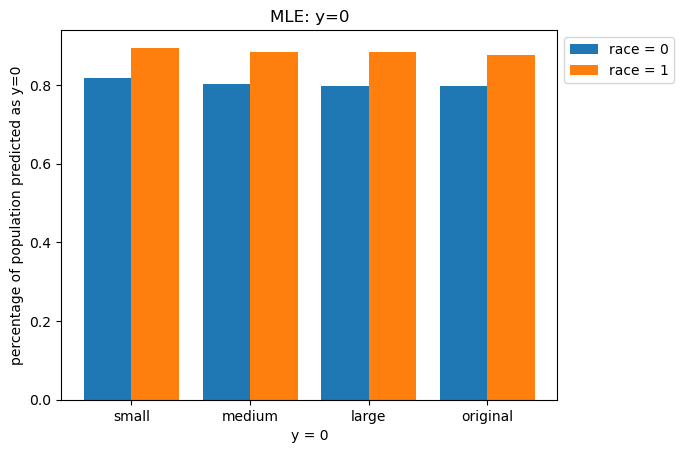

In [307]:
x = ['small','medium','large','original']
r0y0 = [mle_r0_y0_s, mle_r0_y0_m, mle_r0_y0_l, mle_r0_y0]
r1y0 = [mle_r1_y0_s, mle_r1_y0_m, mle_r1_y0_l, mle_r1_y0]
  
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, r0y0, 0.4, label = 'race = 0')
plt.bar(X_axis + 0.2, r1y0, 0.4, label = 'race = 1')
  
plt.xticks(X_axis, x)
plt.xlabel("y = 0")
plt.ylabel("percentage of population predicted as y=0")
plt.title("MLE: y=0")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [308]:
#knn
def knn_prob(trainx, trainy, testx, k, norm):
    y0 = y1= 0
    num = len(testx)
    for a in range(num):
        if knn(trainx, trainy, testx[a], k, norm) == 1:
            y1 += 1
        else:
            y0 += 1
    return y0/num, y1/num

In [309]:
k1n1_y0_r0, k1n1_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 1, 1)
k1n2_y0_r0, k1n2_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 1, 2)
k1nf_y0_r0, k1nf_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 1, np.inf)

k3n1_y0_r0, k3n1_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 3, 1)
k3n2_y0_r0, k3n2_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 3, 2)
k3nf_y0_r0, k3nf_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 3, np.inf)

k5n1_y0_r0, k5n1_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 5, 1)
k5n2_y0_r0, k5n2_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 5, 2)
k5nf_y0_r0, k5nf_y1_r0 = knn_prob(train_X, train_Y,x_test_0, 5, np.inf)

k1n1_y0_r1, k1n1_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 1, 1)
k1n2_y0_r1, k1n2_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 1, 2)
k1nf_y0_r1, k1nf_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 1, np.inf)

k3n1_y0_r1, k3n1_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 3, 1)
k3n2_y0_r1, k3n2_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 3, 2)
k3nf_y0_r1, k3nf_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 3, np.inf)

k5n1_y0_r1, k5n1_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 5, 1)
k5n2_y0_r1, k5n2_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 5, 2)
k5nf_y0_r1, k5nf_y1_r1 = knn_prob(train_X, train_Y,x_test_1, 5, np.inf)

In [310]:
# naive bayes
def nb_prob(feature, df0, df1, test_dp, prior0, prior1):
    num = len(test_dp)
    y0=y1=0
    for i in range(num):
        if naive_bayes_prediction(feature, df0, df1, test_dp[i], prior0, prior1) == 1:
            y1+=1
        else:
            y0+=1
    return y0/num, y1/num
        
nb_y0_r0, nb_y1_r0 = nb_prob(feature_column, train_0, train_1, x_test_0, prior_0, prior_1)
nb_y0_r1, nb_y1_r1 = nb_prob(feature_column, train_0, train_1, x_test_1, prior_0, prior_1)

In [311]:
x = ['mle', 'k1n1', 'k1n2','k1nf','k3n1', 'k3n2','k3nf','k5n1','k5n2','k5nf', 'nb']
r0y0 = [mle_r0_y0, 
        k1n1_y0_r0, k1n2_y0_r0, k1nf_y0_r0, 
        k3n1_y0_r0, k3n2_y0_r0, k3nf_y0_r0, 
        k5n1_y0_r0, k5n2_y0_r0, k5nf_y0_r0,
        nb_y0_r0]
r1y0 = [mle_r1_y0, 
        k1n1_y0_r1, k1n2_y0_r1, k1nf_y0_r1, 
        k3n1_y0_r1, k3n2_y0_r1, k3nf_y0_r1, 
        k5n1_y0_r1, k5n2_y0_r1, k5nf_y0_r1,
        nb_y0_r1]

r0y1 = [mle_r0_y1, 
        k1n1_y1_r0, k1n2_y1_r0, k1nf_y1_r0, 
        k3n1_y1_r0, k3n2_y1_r0, k3nf_y1_r0, 
        k5n1_y1_r0, k5n2_y1_r0, k5nf_y1_r0,
        nb_y1_r0]
r1y1 = [mle_r1_y1, 
        k1n1_y1_r1, k1n2_y1_r1, k1nf_y1_r1, 
        k3n1_y1_r1, k3n2_y1_r1, k3nf_y1_r1, 
        k5n1_y1_r1, k5n2_y1_r1, k5nf_y1_r1,
        nb_y1_r1]

y0a1 = np.array(r1y0)
y0a2 = np.array(r0y0)
a0 = np.subtract(y0a1,y0a2)
diff_y0 = list(a0)

y1a1 = np.array(r1y1)
y1a2 = np.array(r0y1)
a1 = np.subtract(y1a1,y1a2)
diff_y1 = list(a1)

X_axis = np.arange(len(x))

Text(0.5, 1.0, 'P1[Y=1] - P0[Y=1]')

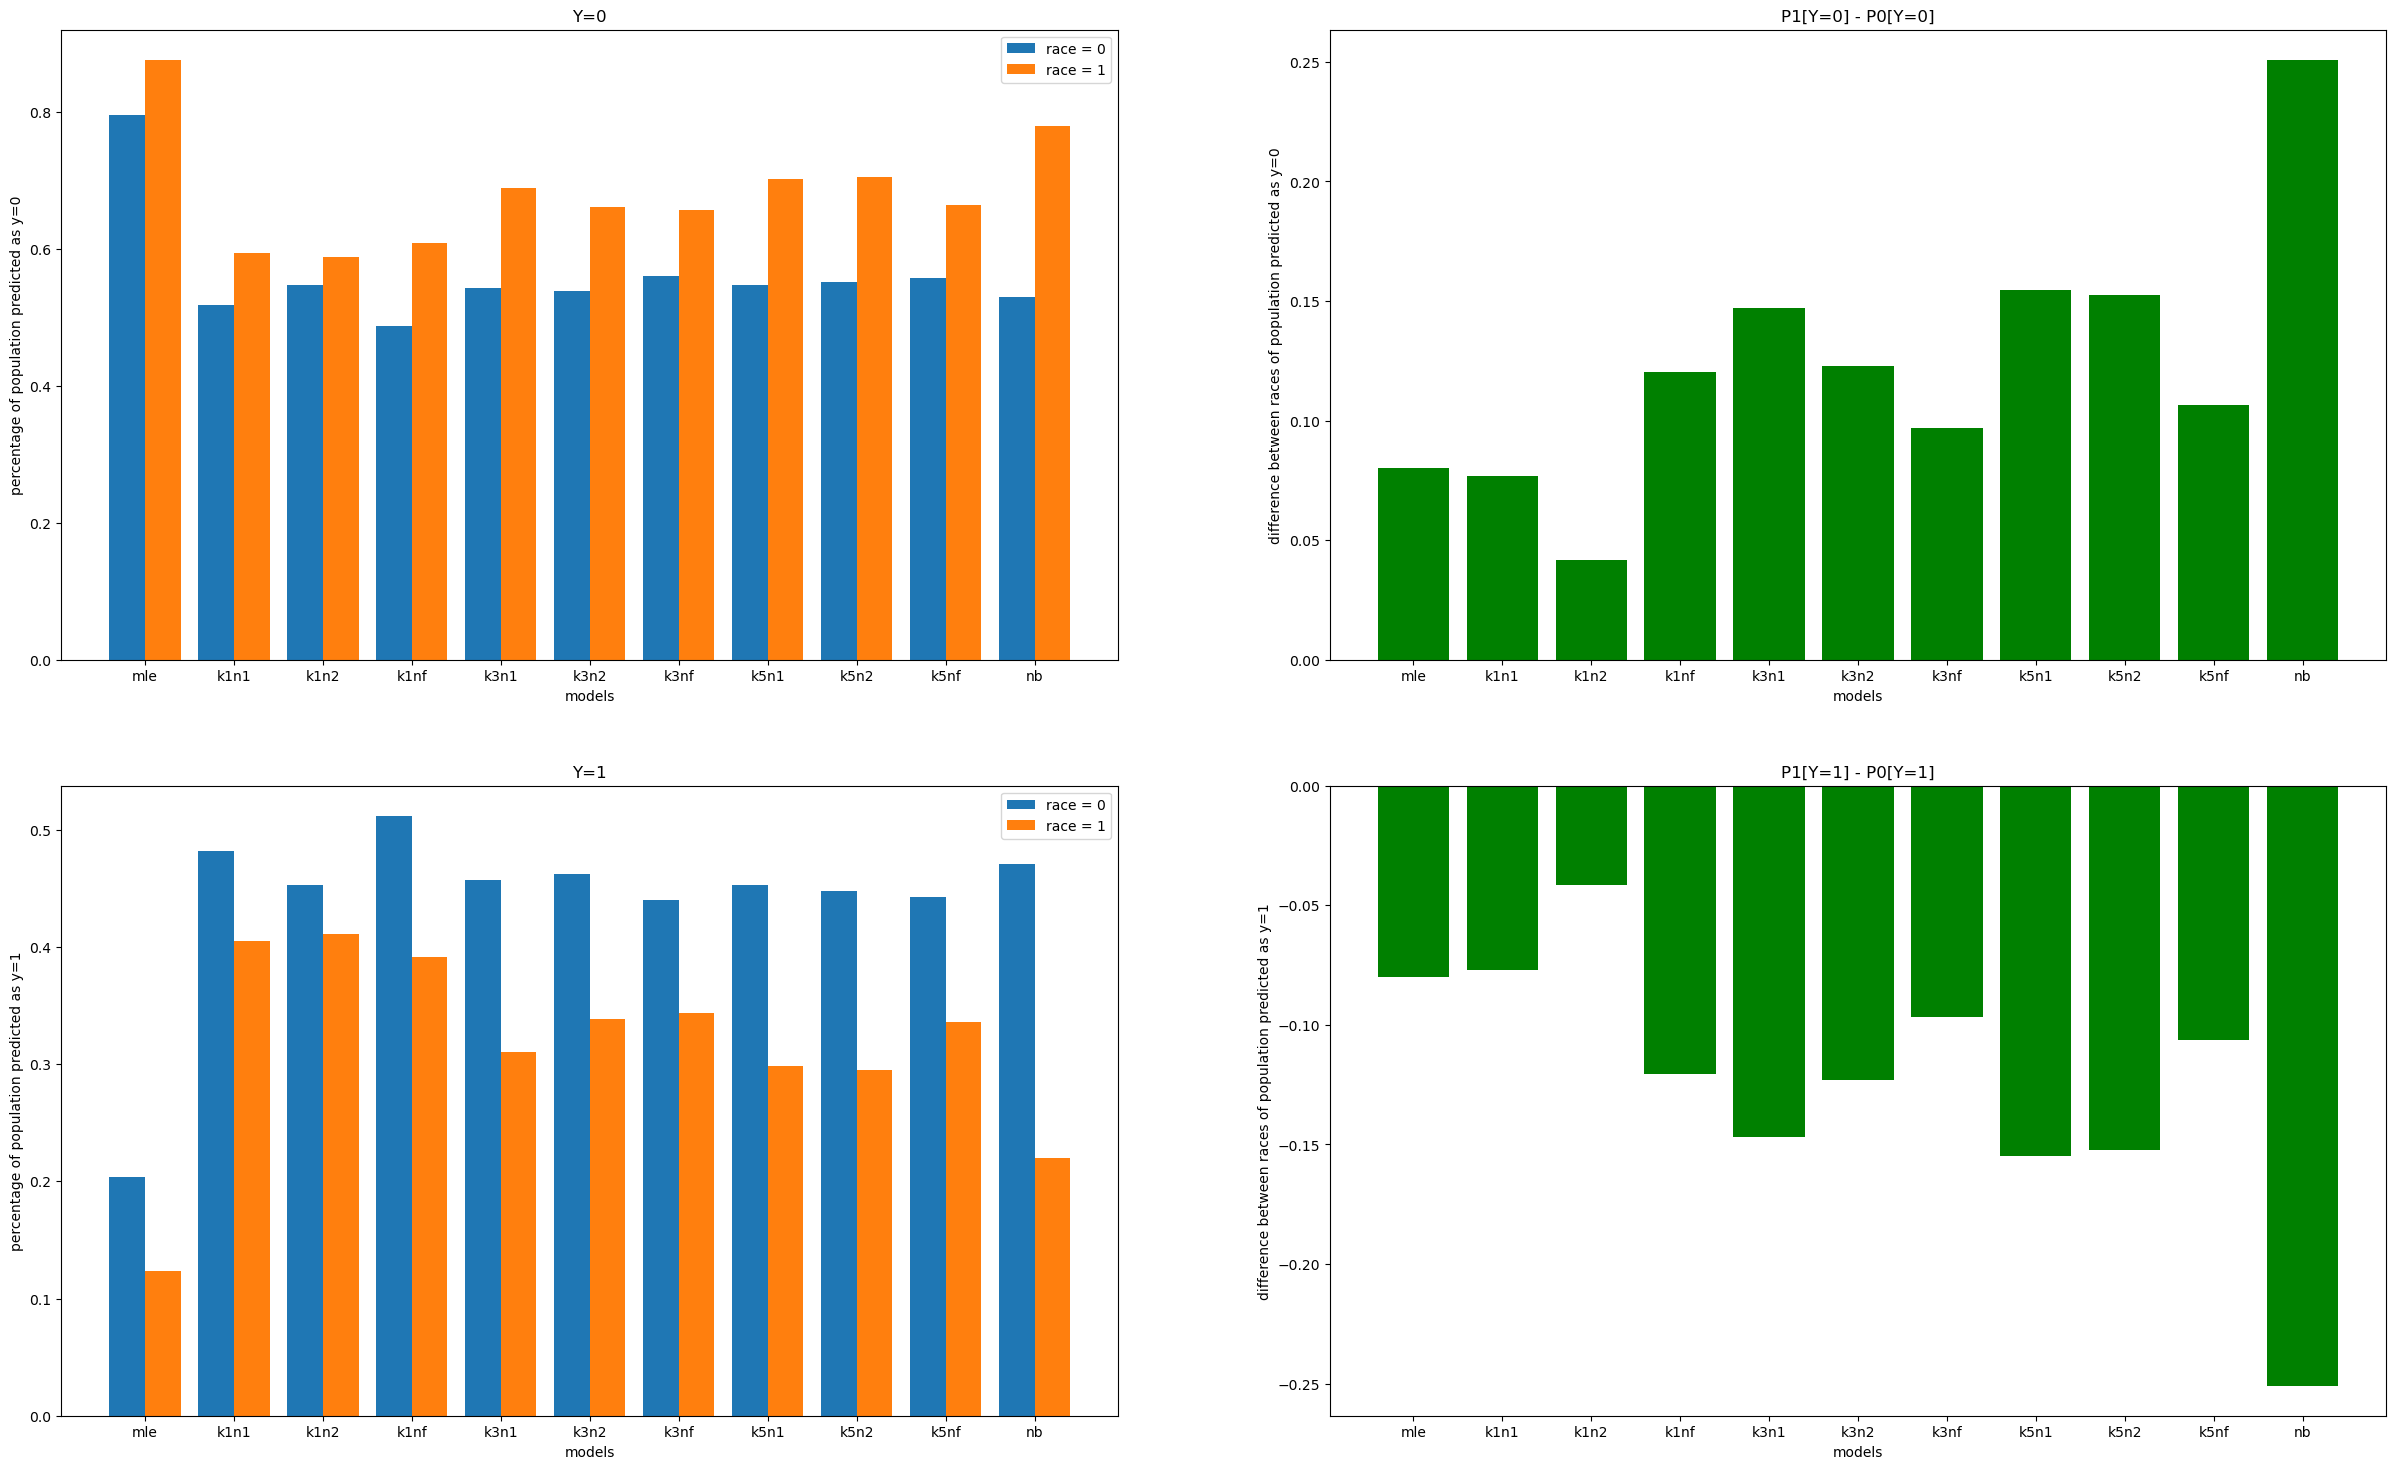

In [312]:
fig, axs = plt.subplots(2, 2, figsize=(30, 18))

axs[0,0].bar(X_axis - 0.2, r0y0, 0.4,label = 'race = 0')
axs[0,0].bar(X_axis + 0.2, r1y0, 0.4,label = 'race = 1')
axs[0,0].set_xticks(X_axis, x)
axs[0,0].set_xlabel("models")
axs[0,0].set_ylabel("percentage of population predicted as y=0")
axs[0,0].set_title("Y=0")
axs[0,0].legend(bbox_to_anchor=(1.0, 1.0))

axs[0,1].bar(x,diff_y0, color='green')
axs[0,1].set_xlabel('models')
axs[0,1].set_ylabel('difference between races of population predicted as y=0')
axs[0,1].set_title('P1[Y=0] - P0[Y=0]')

axs[1,0].bar(X_axis - 0.2, r0y1, 0.4,label = 'race = 0')
axs[1,0].bar(X_axis + 0.2, r1y1, 0.4,label = 'race = 1')
axs[1,0].set_xticks(X_axis, x)
axs[1,0].set_xlabel("models")
axs[1,0].set_ylabel("percentage of population predicted as y=1")
axs[1,0].set_title("Y=1")
axs[1,0].legend(bbox_to_anchor=(1.0, 1.0))

axs[1,1].bar(x,diff_y1, color='green')
axs[1,1].set_xlabel('models')
axs[1,1].set_ylabel('difference between races of population predicted as y=1')
axs[1,1].set_title('P1[Y=1] - P0[Y=1]')

# Equalized Odds: P0[Yˆ =yˆ|Y =y]=P1[Yˆ =yˆ|Y =y]

In [329]:
dtest_y0 = d_test.loc[d_test['two_year_recid'] == 0]
dtest_y1 = d_test.loc[d_test['two_year_recid'] == 1]

test_y0r0 = dtest_y0.loc[d_test['race'] == 0]
x_test_y0r0 = test_y0r0[feature_column].values
num_testy0r0 = len(test_y0r0)

test_y0r1 = dtest_y0.loc[d_test['race'] == 1]
x_test_y0r1 = test_y0r1[feature_column].values
num_testy0r1 = len(test_y0r1)

test_y1r0 = dtest_y1.loc[d_test['race'] == 0]
x_test_y1r0 = test_y1r0[feature_column].values
num_testy1r0 = len(test_y1r0)

test_y1r1 = dtest_y1.loc[d_test['race'] == 1]
x_test_y1r1 = test_y1r1[feature_column].values
num_testy1r1 = len(test_y1r1)

In [330]:
#mle race = 0, y=0
num_r0_y0p0 = num_r0_y0p1 = 0
for i in range(num_testy0r0):
    if mle(x_test_y0r0[i], u_0, cov_0)* prior_0 > mle(x_test_y0r0[i], u_1, cov_1) * prior_1:
            num_r0_y0p0 +=1
    else:
        num_r0_y0p1 += 1
#mle race = 1, y=0
num_r1_y0p0 = num_r1_y0p1 = 0
for i in range(num_testy0r1):
    if mle(x_test_y0r1[i], u_0, cov_0)* prior_0 > mle(x_test_y0r1[i], u_1, cov_1) * prior_1:
            num_r1_y0p0 +=1
    else:
        num_r1_y0p1 += 1
#mle race = 0, y=1
num_r0_y1p0 = num_r0_y1p1 = 0
for i in range(num_testy1r0):
    if mle(x_test_y1r0[i], u_0, cov_0)* prior_0 > mle(x_test_y1r0[i], u_1, cov_1) * prior_1:
            num_r0_y1p0 +=1
    else:
        num_r0_y1p1 += 1        
#mle race = 1, y=1
num_r1_y1p0 = num_r1_y1p1 = 0
for i in range(num_testy1r1):
    if mle(x_test_y1r1[i], u_0, cov_0)* prior_0 > mle(x_test_y1r1[i], u_1, cov_1) * prior_1:
            num_r1_y1p0 +=1
    else:
        num_r1_y1p1 += 1

eo_mle_y0p0_r0 = num_r0_y0p0/num_testy0r0
eo_mle_y0p0_r1 = num_r1_y0p0/num_testy0r1
eo_mle_y1p1_r0 = num_r0_y1p1/num_testy1r0
eo_mle_y1p1_r1 = num_r1_y1p1/num_testy1r1

In [331]:
#knn
def knn_eo(trainx, trainy, testx, num, k, norm):
    y0 = y1= 0
    for a in range(len(testx)):
        if knn(trainx, trainy, testx[a], k, norm) == 1:
            y1 += 1
        else:
            y0 += 1
    return y0/num, y1/num
#knn race=0
k1n1_y0p0_r0, k1n1_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 1, 1)
k1n2_y0p0_r0, k1n2_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 1, 2)
k1nf_y0p0_r0, k1nf_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 1, np.inf)

k3n1_y0p0_r0, k3n1_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 3, 1)
k3n2_y0p0_r0, k3n2_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 3, 2)
k3nf_y0p0_r0, k3nf_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 3, np.inf)

k5n1_y0p0_r0, k5n1_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 5, 1)
k5n2_y0p0_r0, k5n2_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 5, 2)
k5nf_y0p0_r0, k5nf_y0p1_r0 = knn_eo(train_X, train_Y,x_test_y0r0, num_testy0r0, 5, np.inf)

k1n1_y1p0_r0, k1n1_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 1, 1)
k1n2_y1p0_r0, k1n2_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 1, 2)
k1nf_y1p0_r0, k1nf_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 1, np.inf)

k3n1_y1p0_r0, k3n1_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 3, 1)
k3n2_y1p0_r0, k3n2_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 3, 2)
k3nf_y1p0_r0, k3nf_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 3, np.inf)

k5n1_y1p0_r0, k5n1_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 5, 1)
k5n2_y1p0_r0, k5n2_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 5, 2)
k5nf_y1p0_r0, k5nf_y1p1_r0 = knn_eo(train_X, train_Y,x_test_y1r0, num_testy1r0, 5, np.inf)

#knn race=1
k1n1_y0p0_r1, k1n1_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 1, 1)
k1n2_y0p0_r1, k1n2_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 1, 2)
k1nf_y0p0_r1, k1nf_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 1, np.inf)

k3n1_y0p0_r1, k3n1_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 3, 1)
k3n2_y0p0_r1, k3n2_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 3, 2)
k3nf_y0p0_r1, k3nf_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 3, np.inf)

k5n1_y0p0_r1, k5n1_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 5, 1)
k5n2_y0p0_r1, k5n2_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 5, 2)
k5nf_y0p0_r1, k5nf_y0p1_r1 = knn_eo(train_X, train_Y,x_test_y0r1, num_testy0r1, 5, np.inf)

k1n1_y1p0_r1, k1n1_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 1, 1)
k1n2_y1p0_r1, k1n2_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 1, 2)
k1nf_y1p0_r1, k1nf_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 1, np.inf)

k3n1_y1p0_r1, k3n1_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 3, 1)
k3n2_y1p0_r1, k3n2_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 3, 2)
k3nf_y1p0_r1, k3nf_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 3, np.inf)

k5n1_y1p0_r1, k5n1_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 5, 1)
k5n2_y1p0_r1, k5n2_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 5, 2)
k5nf_y1p0_r1, k5nf_y1p1_r1 = knn_eo(train_X, train_Y,x_test_y1r1, num_testy1r1, 5, np.inf)

In [332]:
#nb
def nb_eo(feature, df0, df1, test_dp, num, prior0, prior1):
    p0=p1=0
    for i in range(len(test_dp)):
        if naive_bayes_prediction(feature, df0, df1, test_dp[i], prior0, prior1) == 1:
            p1+=1
        else:
            p0+=1
    return p0/num, p1/num
        
nb_y0p0_r0, nb_y0p1_r0 = nb_eo(feature_column, train_0, train_1, x_test_y0r0, num_testy0r0, prior_0, prior_1)
nb_y1p0_r0, nb_y1p1_r0 = nb_eo(feature_column, train_0, train_1, x_test_y1r0, num_testy1r0, prior_0, prior_1)
nb_y0p0_r1, nb_y0p1_r1 = nb_eo(feature_column, train_0, train_1, x_test_y0r1, num_testy0r1, prior_0, prior_1)
nb_y1p0_r1, nb_y1p1_r1 = nb_eo(feature_column, train_0, train_1, x_test_y1r1, num_testy1r1, prior_0, prior_1)

Text(0.5, 1.0, 'P0[Yˆ =0|Y =0] - P1[Yˆ =0|Y =0]')

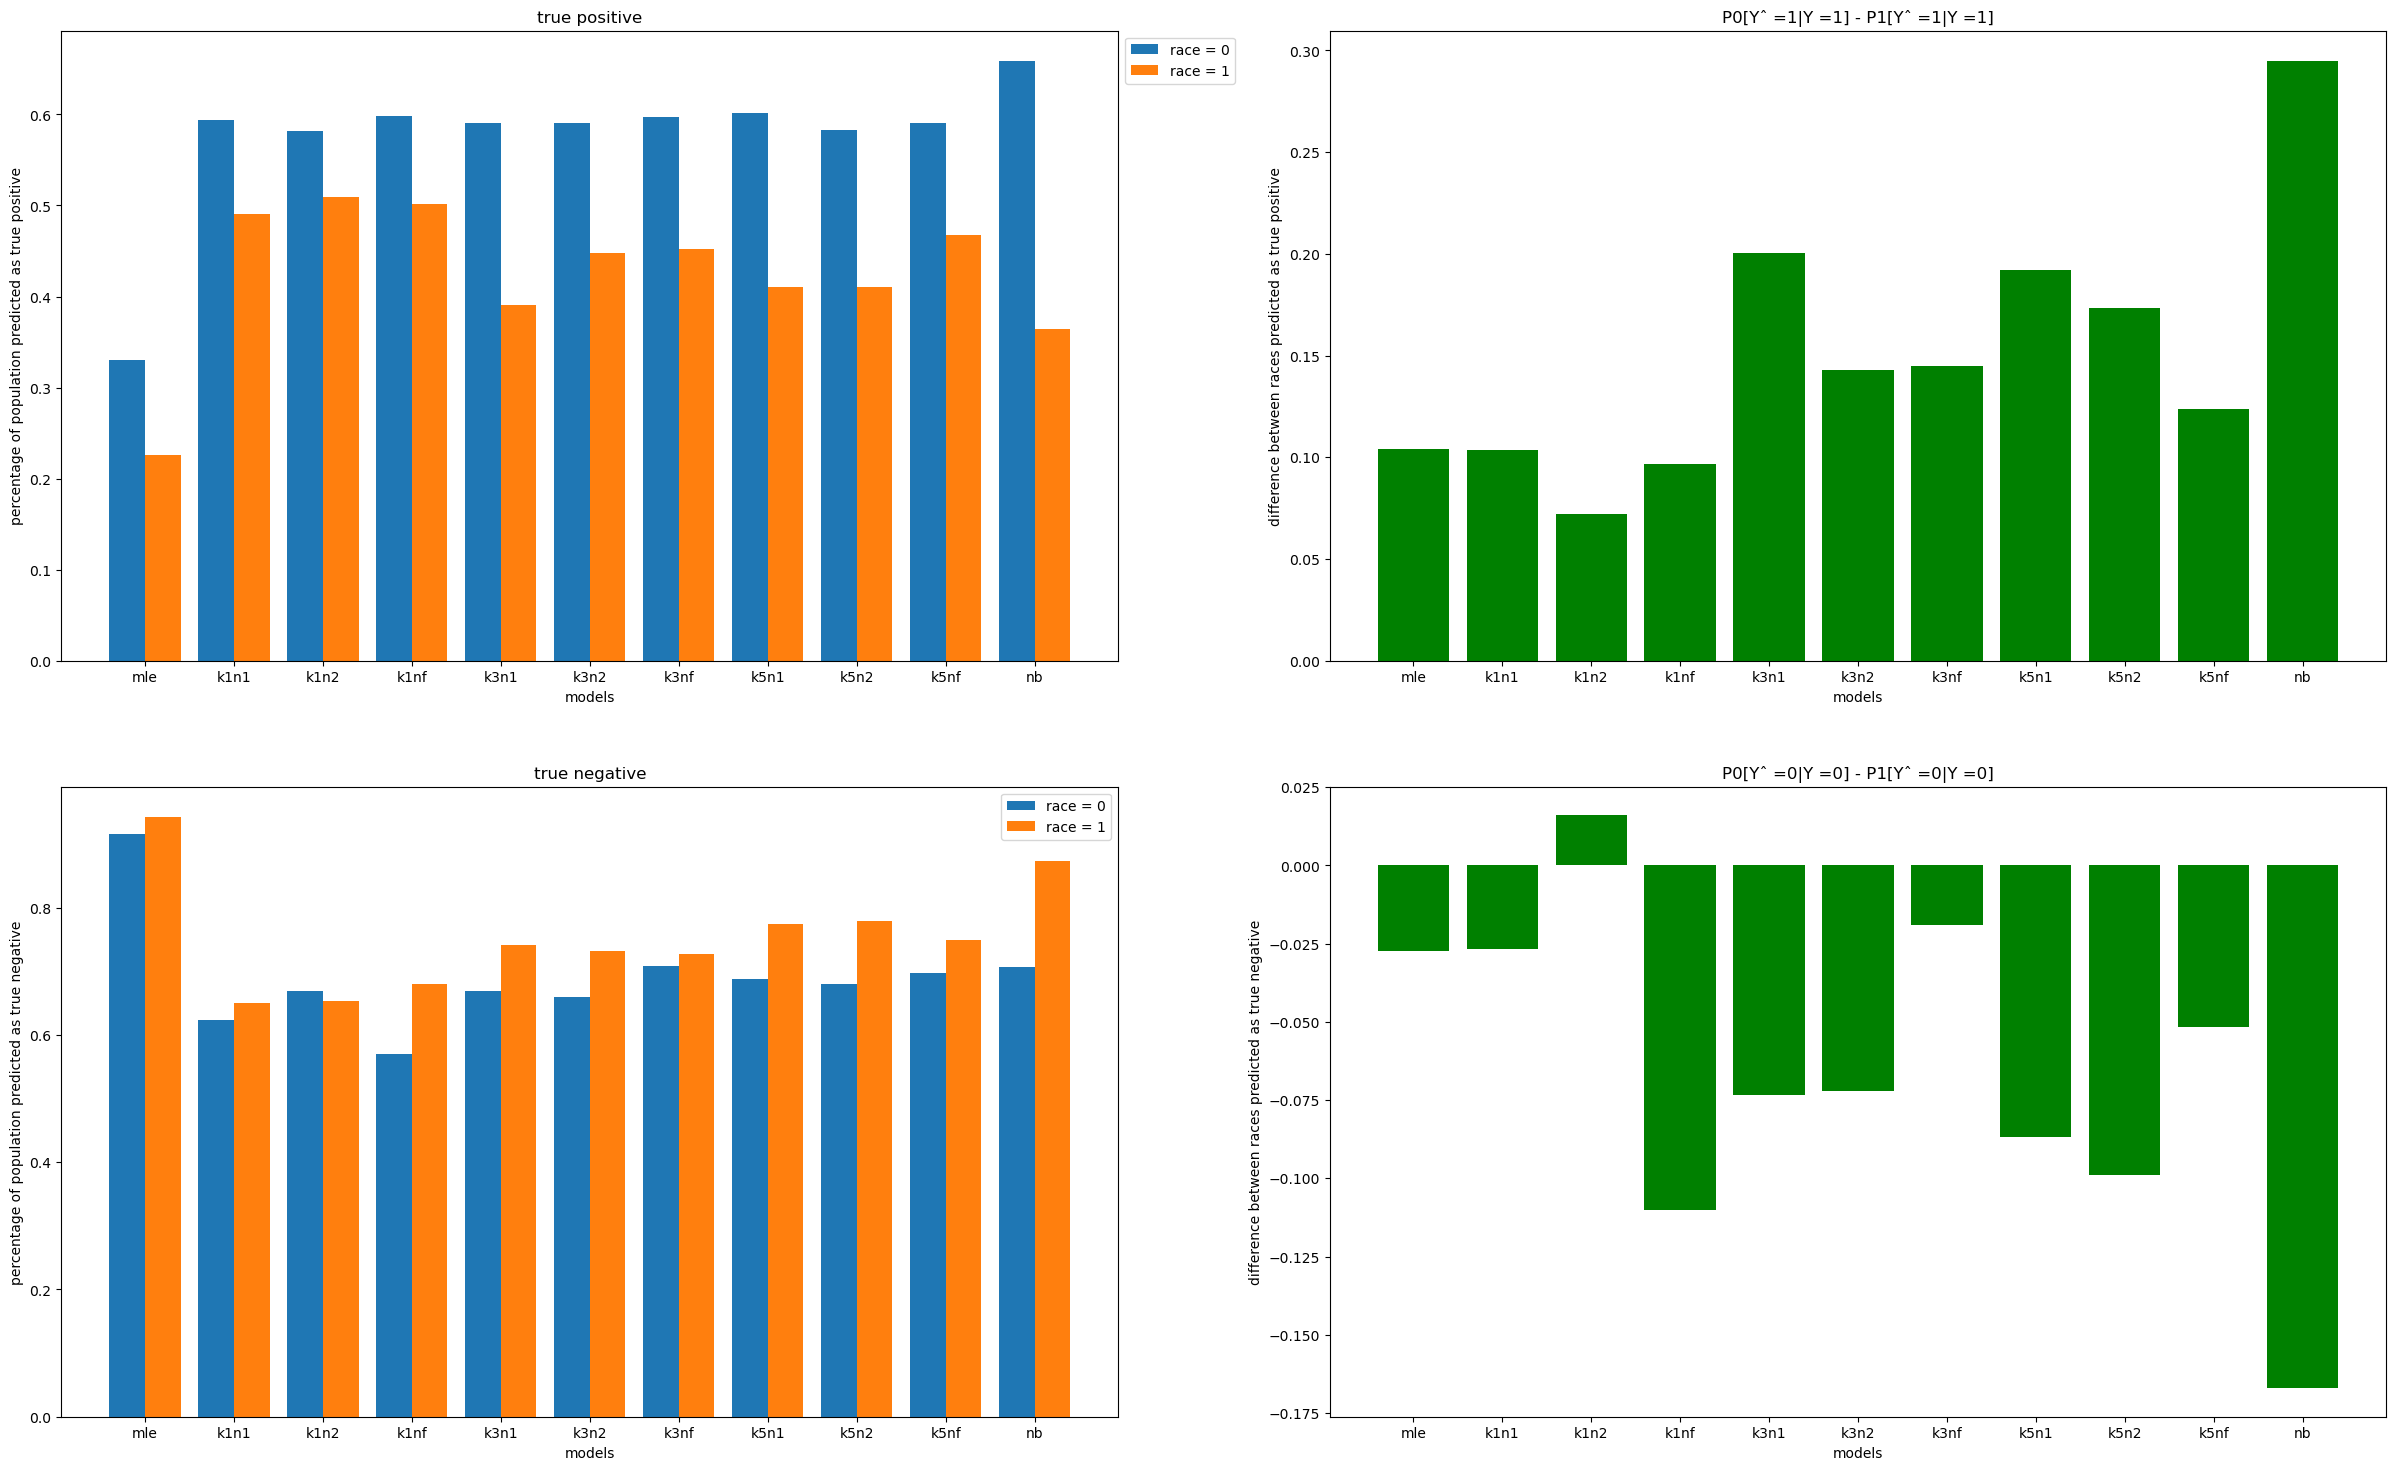

In [333]:
fig, axs = plt.subplots(2, 2, figsize=(30, 18))
x = ['mle', 'k1n1', 'k1n2','k1nf','k3n1', 'k3n2','k3nf','k5n1','k5n2','k5nf', 'nb']
tpr0 = [eo_mle_y1p1_r0, 
        k1n1_y1p1_r0, k1n2_y1p1_r0, k1nf_y1p1_r0,
        k3n1_y1p1_r0, k3n2_y1p1_r0, k3nf_y1p1_r0,
        k5n1_y1p1_r0, k5n2_y1p1_r0, k5nf_y1p1_r0,
        nb_y1p1_r0]
tpr1 = [eo_mle_y1p1_r1, 
        k1n1_y1p1_r1, k1n2_y1p1_r1, k1nf_y1p1_r1,
        k3n1_y1p1_r1, k3n2_y1p1_r1, k3nf_y1p1_r1,
        k5n1_y1p1_r1, k5n2_y1p1_r1, k5nf_y1p1_r1,
        nb_y1p1_r1]
tnr0 = [eo_mle_y0p0_r0, 
        k1n1_y0p0_r0, k1n2_y0p0_r0, k1nf_y0p0_r0,
        k3n1_y0p0_r0, k3n2_y0p0_r0, k3nf_y0p0_r0,
        k5n1_y0p0_r0, k5n2_y0p0_r0, k5nf_y0p0_r0,
        nb_y0p0_r0]
tnr1 = [eo_mle_y0p0_r1,
        k1n1_y0p0_r1, k1n2_y0p0_r1, k1nf_y0p0_r1,
        k3n1_y0p0_r1, k3n2_y0p0_r1, k3nf_y0p0_r1,
        k5n1_y0p0_r1, k5n2_y0p0_r1, k5nf_y0p0_r1,
        nb_y0p0_r1]

atpr0 = np.array(tpr0)
atpr1 = np.array(tpr1)
a0 = np.subtract(atpr0,atpr1)
diff_y0 = list(a0)

atnr0 = np.array(tnr0)
atnr1 = np.array(tnr1)
a1 = np.subtract(atnr0,atnr1)
diff_y1 = list(a1)

X_axis = np.arange(len(x))


axs[0,0].bar(X_axis - 0.2, tpr0, 0.4,label = 'race = 0')
axs[0,0].bar(X_axis + 0.2, tpr1, 0.4,label = 'race = 1')
axs[0,0].set_xticks(X_axis, x)
axs[0,0].set_xlabel("models")
axs[0,0].set_ylabel("percentage of population predicted as true positive")
axs[0,0].set_title("true positive")
axs[0,0].legend(bbox_to_anchor=(1.0, 1.0))

axs[0,1].bar(x,diff_y0, color='green')
axs[0,1].set_xlabel('models')
axs[0,1].set_ylabel('difference between races predicted as true positive')
axs[0,1].set_title('P0[Yˆ =1|Y =1] - P1[Yˆ =1|Y =1]')

axs[1,0].bar(X_axis - 0.2, tnr0, 0.4,label = 'race = 0')
axs[1,0].bar(X_axis + 0.2, tnr1, 0.4,label = 'race = 1')
axs[1,0].set_xticks(X_axis, x)
axs[1,0].set_xlabel("models")
axs[1,0].set_ylabel("percentage of population predicted as true negative")
axs[1,0].set_title("true negative")
axs[1,0].legend(bbox_to_anchor=(1.0, 1.0))

axs[1,1].bar(x,diff_y1, color='green')
axs[1,1].set_xlabel('models')
axs[1,1].set_ylabel('difference between races predicted as true negative')
axs[1,1].set_title('P0[Yˆ =0|Y =0] - P1[Yˆ =0|Y =0]')

 # Predictive Parity: P0[Y =y|Yˆ =yˆ]=P1[Y =y|Yˆ =yˆ]

In [319]:
#mle race = 0
num_r0_p0y0=num_r0_p0y1=num_r0_p1y0 = num_r0_p1y1 = 0
num_r0_p0=num_r0_p1=0
for i in range(num_race_0):
    if mle(x_test_0[i], u_0, cov_0)* prior_0 > mle(x_test_0[i], u_1, cov_1) * prior_1:
        num_r0_p0+=1
        if y_test_0[i] == 0:
            num_r0_p0y0+=1
    else:
        num_r0_p1+=1
        if y_test_0[i] == 1:
            num_r0_p1y1+=1
#mle race=1 
num_r1_p0y0=num_r1_p0y1=num_r1_p1y0 = num_r1_p1y1 = 0
num_r1_p0=num_r1_p1=0
for i in range(num_race_1):
    if mle(x_test_1[i], u_0, cov_0)* prior_0 > mle(x_test_1[i], u_1, cov_1) * prior_1:
        num_r1_p0+=1
        if y_test_1[i] == 0:
            num_r1_p0y0+=1
    else:
        num_r1_p1+=1
        if y_test_1[i] == 1:
            num_r1_p1y1+=1
mle_pp_p0y0_r0 = num_r0_p0y0/num_r0_p0
mle_pp_p0y0_r1 = num_r1_p0y0/num_r1_p0
mle_pp_p1y1_r0 = num_r0_p1y1/num_r0_p1
mle_pp_p1y1_r1 = num_r1_p1y1/num_r1_p1

In [320]:
#knn
def knn_pp(trainx, trainy, testx, testy, k, norm):
    p0y0 = p1y1 = p0y1 = p1y0 = 0
    num_p0 = num_p1 = 0
    for a in range(len(testx)):
        if knn(trainx, trainy, testx[a], k, norm) == 1:
            num_p1+=1
            if testy[a] == 1:
                p1y1+=1
        else:
            num_p0+=1
            if testy[a] == 0:
                p0y0 +=1

    return p0y0/num_p0, p1y1/num_p1

k1n1_p0y0_r0, k1n1_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 1, 1)
k1n1_p0y0_r1, k1n1_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 1, 1)
k3n1_p0y0_r0, k3n1_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 3, 1)
k3n1_p0y0_r1, k3n1_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 3, 1)
k5n1_p0y0_r0, k5n1_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 5, 1)
k5n1_p0y0_r1, k5n1_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 5, 1)

k1n2_p0y0_r0, k1n2_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 1, 2)
k1n2_p0y0_r1, k1n2_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 1, 2)
k3n2_p0y0_r0, k3n2_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 3, 2)
k3n2_p0y0_r1, k3n2_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 3, 2)
k5n2_p0y0_r0, k5n2_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 5, 2)
k5n2_p0y0_r1, k5n2_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 5, 2)

k1nf_p0y0_r0, k1nf_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 1, np.inf)
k1nf_p0y0_r1, k1nf_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 1, np.inf)
k3nf_p0y0_r0, k3nf_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 3, np.inf)
k3nf_p0y0_r1, k3nf_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 3, np.inf)
k5nf_p0y0_r0, k5nf_p1y1_r0 = knn_pp(train_X, train_Y,x_test_0, y_test_0, 5, np.inf)
k5nf_p0y0_r1, k5nf_p1y1_r1 = knn_pp(train_X, train_Y,x_test_1, y_test_1, 5, np.inf)

In [321]:
#naive bayes
def nb_pp(feature, df0, df1, test_x, test_y, prior0, prior1):
    num = len(test_x)
    p0y0=p1y1=0
    n_p0=n_p1=0
    for i in range(num):
        if naive_bayes_prediction(feature, df0, df1, test_x[i], prior0, prior1) == 1:
            n_p1+=1
            if test_y[i] == 1:
                p1y1+=1
        else:
            n_p0+=1
            if test_y[i] == 0:
                p0y0 +=1
    return p1y1/n_p1, p0y0/n_p0
        
nb_p1y1_r0, nb_p0y0_r0 = nb_pp(feature_column, train_0, train_1, x_test_0,y_test_0, prior_0, prior_1)
nb_p1y1_r1, nb_p0y0_r1 = nb_pp(feature_column, train_0, train_1, x_test_1,y_test_1, prior_0, prior_1)

Text(0.5, 1.0, 'P0[Y =0|Y^ =0] - P1[Y =0|Y^ =0]')

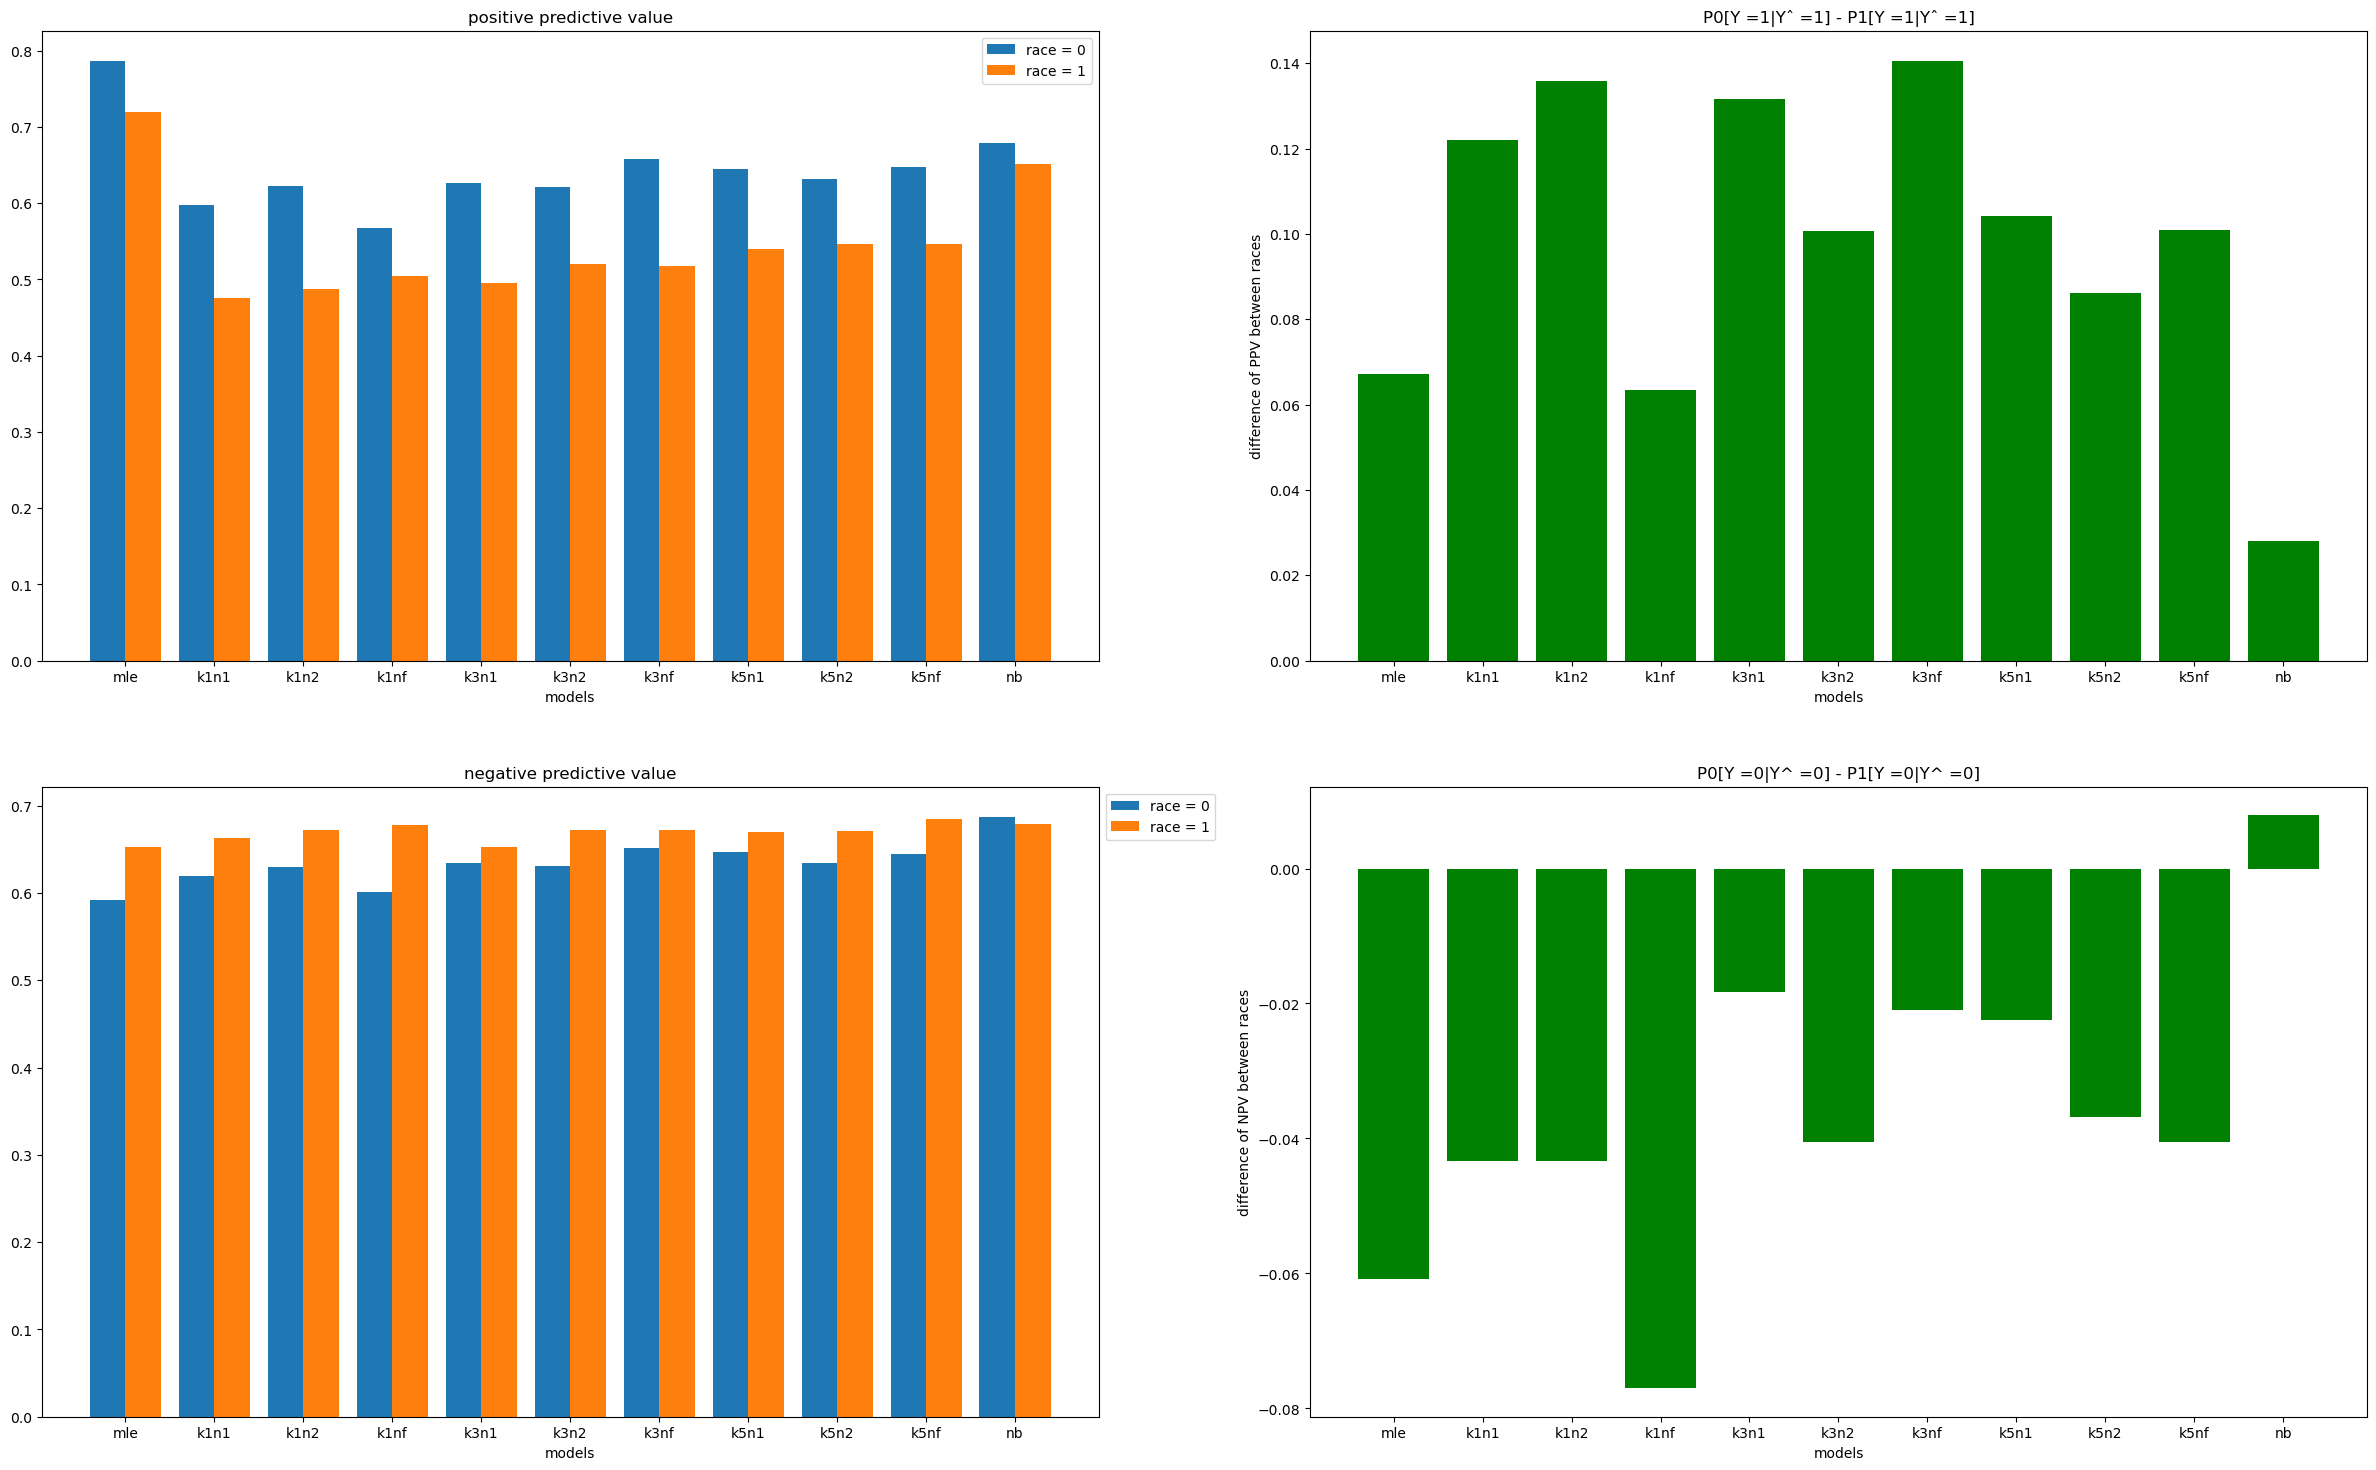

In [322]:
fig, axs = plt.subplots(2, 2, figsize=(30, 18))
x = ['mle', 'k1n1', 'k1n2','k1nf','k3n1', 'k3n2','k3nf','k5n1','k5n2','k5nf', 'nb']
tprer0 = [mle_pp_p1y1_r0, 
          k1n1_p1y1_r0, k1n2_p1y1_r0, k1nf_p1y1_r0,
          k3n1_p1y1_r0, k3n2_p1y1_r0, k3nf_p1y1_r0,
          k5n1_p1y1_r0, k5n2_p1y1_r0, k5nf_p1y1_r0,
          nb_p1y1_r0]
tprer1 = [mle_pp_p1y1_r1, 
          k1n1_p1y1_r1, k1n2_p1y1_r1, k1nf_p1y1_r1,
          k3n1_p1y1_r1, k3n2_p1y1_r1, k3nf_p1y1_r1,
          k5n1_p1y1_r1, k5n2_p1y1_r1, k5nf_p1y1_r1,
          nb_p1y1_r1]
fprer0 = [mle_pp_p0y0_r0, 
          k1n1_p0y0_r0, k1n2_p0y0_r0, k1nf_p0y0_r0,
          k3n1_p0y0_r0, k3n2_p0y0_r0, k3nf_p0y0_r0,
          k5n1_p0y0_r0, k5n2_p0y0_r0, k5nf_p0y0_r0,
          nb_p0y0_r0]
fprer1 = [mle_pp_p0y0_r1,
          k1n1_p0y0_r1, k1n2_p0y0_r1, k1nf_p0y0_r1,
          k3n1_p0y0_r1, k3n2_p0y0_r1, k3nf_p0y0_r1,
          k5n1_p0y0_r1, k5n2_p0y0_r1, k5nf_p0y0_r1,
          nb_p0y0_r1]

atr0 = np.array(tprer0)
atr1 = np.array(tprer1)
at0 = np.subtract(atr0,atr1)
diff_at = list(at0)

afr0 = np.array(fprer0)
afr1 = np.array(fprer1)
at1 = np.subtract(afr0,afr1)
diff_af = list(at1)

X_axis = np.arange(len(x))


axs[0,0].bar(X_axis - 0.2, tprer0, 0.4,label = 'race = 0')
axs[0,0].bar(X_axis + 0.2, tprer1, 0.4,label = 'race = 1')
axs[0,0].set_xticks(X_axis, x)
axs[0,0].set_xlabel("models")
axs[0,0].set_title("positive predictive value")
axs[0,0].legend(bbox_to_anchor=(1.0, 1.0))

axs[0,1].bar(x,diff_at, color='green')
axs[0,1].set_xlabel('models')
axs[0,1].set_ylabel('difference of PPV between races')
axs[0,1].set_title('P0[Y =1|Yˆ =1] - P1[Y =1|Yˆ =1]')

axs[1,0].bar(X_axis - 0.2, fprer0, 0.4,label = 'race = 0')
axs[1,0].bar(X_axis + 0.2, fprer1, 0.4,label = 'race = 1')
axs[1,0].set_xticks(X_axis, x)
axs[1,0].set_xlabel("models")
axs[1,0].set_title("negative predictive value")
axs[1,0].legend(bbox_to_anchor=(1.0, 1.0))

axs[1,1].bar(x,diff_af, color='green')
axs[1,1].set_xlabel('models')
axs[1,1].set_ylabel('difference of NPV between races')
axs[1,1].set_title('P0[Y =0|Y^ =0] - P1[Y =0|Y^ =0]')